In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Color agreements for the notebook

Palette used:
https://github.com/EmilHvitfeldt/r-color-palettes/blob/main/discrete/awtools/a_palette/examples.png

* Low, Medium, High  -> "#FF5733FF", "#FFC300FF", "#4CAF50FF"
* Satisfaction levels -> "#E84A5FFF", "#FECEA8FF", "#019875FF"
* Yes, No -> "#99B898FF", "#FF847CFF"
* Female, Male -> "#E84A5FFF", "#2A363BFF"

In [2]:
degree_color_palette = ["#FF5733FF", "#FFC300FF", "#4CAF50FF"]
satisfaction_color_palette = ["#E84A5FFF", "#FECEA8FF", "#019875FF"]
boolean_color_palette = ["#99B898FF", "#FF847CFF"]
gender_color_palette = ["#E84A5FFF", "#2A363BFF"]

In [3]:
degree_labels = ['Low', 'Medium', 'High']

In [4]:
# Set Seaborn theme
sns.set_theme(style="whitegrid")

In [5]:
df = pd.read_csv("edu_dataset.csv")
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


### Performance depending on gender

In [6]:
women_df = df[(df["gender"] == "F")]
men_df = df[(df["gender"] == "M")]

women_H = women_df[(women_df["Class"] == "H")]
women_M = women_df[(women_df["Class"] == "M")]
women_L = women_df[(women_df["Class"] == "L")]

men_H = men_df[(men_df["Class"] == "H")]
men_M = men_df[(men_df["Class"] == "M")]
men_L = men_df[(men_df["Class"] == "L")]

men_class = len(men_L) / len(men_df), len(men_M) / len(men_df), len(men_H) / len(men_df)
women_class =  len(women_L) / len(women_df), len(women_M) / len(women_df), len(women_H) / len(women_df)

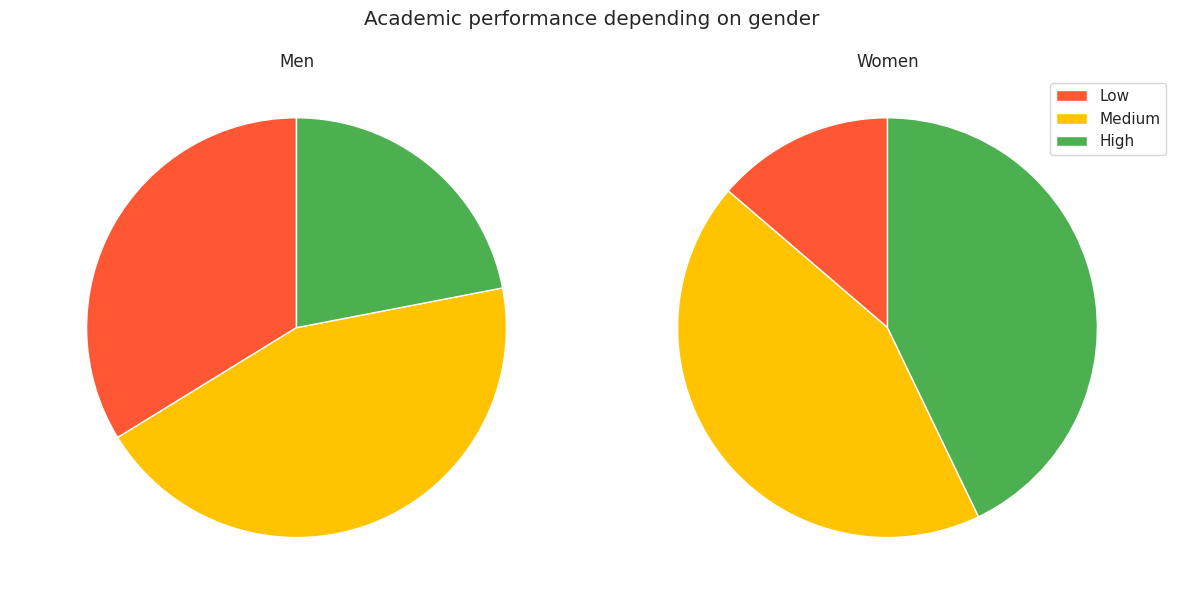

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(men_class, labels=None, startangle=90, colors=degree_color_palette)
axs[0].set_title('Men')

axs[1].pie(women_class, labels=None, startangle=90, colors=degree_color_palette)
axs[1].set_title('Women')

for ax in axs:
    ax.axis('equal')

axs[1].legend(degree_labels, loc="best")

fig.suptitle("Academic performance depending on gender")

plt.tight_layout()
plt.show()

### How nationality / place of birth depends on performance

In [8]:
nationalities = list(set(df.NationalITy))
places_of_birth = list(set(df.PlaceofBirth))
print(f"Nationalities: {nationalities}")
print(f"Places of birth: {places_of_birth}")

Nationalities: ['USA', 'Tunis', 'lebanon', 'Lybia', 'Syria', 'venzuela', 'Egypt', 'Iran', 'Iraq', 'Jordan', 'SaudiArabia', 'Morocco', 'Palestine', 'KW']
Places of birth: ['USA', 'Tunis', 'KuwaIT', 'lebanon', 'Lybia', 'Syria', 'venzuela', 'Egypt', 'Iran', 'Iraq', 'Jordan', 'SaudiArabia', 'Morocco', 'Palestine']


In [9]:
class_on_nationality_dict = {}
for nationality in nationalities:
    nationality_df = df[(df["NationalITy"] == nationality)]
    L_df = df[(df["NationalITy"] == nationality) & (df["Class"] == "L")]
    M_df = df[(df["NationalITy"] == nationality) & (df["Class"] == "M")]
    H_df = df[(df["NationalITy"] == nationality) & (df["Class"] == "H")]
    
    class_on_nationality_dict[nationality] = {
        "H": len(H_df) / len(nationality_df),
        "M": len(M_df) / len(nationality_df),
        "L": len(L_df) / len(nationality_df),
    }
    
class_on_place_of_birth_dict = {}
for place_of_birth in places_of_birth:
    place_of_birth_df = df[(df["PlaceofBirth"] == place_of_birth)]
    L_df = df[(df["PlaceofBirth"] == place_of_birth) & (df["Class"] == "L")]
    M_df = df[(df["PlaceofBirth"] == place_of_birth) & (df["Class"] == "M")]
    H_df = df[(df["PlaceofBirth"] == place_of_birth) & (df["Class"] == "H")]
    
    class_on_place_of_birth_dict[place_of_birth] = {
        "H": len(H_df) / len(place_of_birth_df),
        "M": len(M_df) / len(place_of_birth_df),
        "L": len(L_df) / len(place_of_birth_df),
    }

In [10]:
output_nationality = pd.DataFrame(class_on_nationality_dict).T
output_place_of_birth = pd.DataFrame(class_on_place_of_birth_dict).T
output_nationality.columns = ['High', 'Medium', 'Low']
output_place_of_birth.columns = ['High', 'Medium', 'Low']
print(f"Nationality:\n{output_nationality}\n\n\nPlace of birth:\n{output_place_of_birth}")

Nationality:
                 High    Medium       Low
USA          0.500000  0.333333  0.166667
Tunis        0.250000  0.416667  0.333333
lebanon      0.529412  0.352941  0.117647
Lybia        0.000000  0.000000  1.000000
Syria        0.285714  0.428571  0.285714
venzuela     1.000000  0.000000  0.000000
Egypt        0.222222  0.444444  0.333333
Iran         0.000000  0.666667  0.333333
Iraq         0.636364  0.363636  0.000000
Jordan       0.308140  0.476744  0.215116
SaudiArabia  0.545455  0.363636  0.090909
Morocco      0.250000  0.500000  0.250000
Palestine    0.428571  0.571429  0.000000
KW           0.201117  0.418994  0.379888


Place of birth:
                 High    Medium       Low
USA          0.375000  0.500000  0.125000
Tunis        0.333333  0.333333  0.333333
KuwaIT       0.194444  0.422222  0.383333
lebanon      0.578947  0.315789  0.105263
Lybia        0.000000  0.000000  1.000000
Syria        0.333333  0.500000  0.166667
venzuela     1.000000  0.000000  0.000000
Egy

### StageID influences performance

In [11]:
stage_dictionary = {
    "Primary school": {
        "H": len(df[(df["StageID"] == "lowerlevel") & (df["Class"] == "H")]),
        "M": len(df[(df["StageID"] == "lowerlevel") & (df["Class"] == "M")]),
        "L": len(df[(df["StageID"] == "lowerlevel") & (df["Class"] == "L")]),
    },
    "Middle school": {
        "H": len(df[(df["StageID"] == "MiddleSchool") & (df["Class"] == "H")]),
        "M": len(df[(df["StageID"] == "MiddleSchool") & (df["Class"] == "M")]),
        "L": len(df[(df["StageID"] == "MiddleSchool") & (df["Class"] == "L")]),
    },
    "High school": {
        "H": len(df[(df["StageID"] == "HighSchool") & (df["Class"] == "H")]),
        "M": len(df[(df["StageID"] == "HighSchool") & (df["Class"] == "M")]),
        "L": len(df[(df["StageID"] == "HighSchool") & (df["Class"] == "L")]),
    }
}

for key, value in stage_dictionary.items():
    if key == "Primary school":
        for key_x, value_x in stage_dictionary[key].items():
            stage_dictionary[key][key_x] /= len(df[(df["StageID"] == "lowerlevel")])
    elif key == "Middle school":
        for key_x, value_x in stage_dictionary[key].items():
            stage_dictionary[key][key_x] /= len(df[(df["StageID"] == "MiddleSchool")])
    elif key == "High school":
        for key_x, value_x in stage_dictionary[key].items():
            stage_dictionary[key][key_x] /= len(df[(df["StageID"] == "HighSchool")])
    else:
        print("WARNING: Unknown StageID")

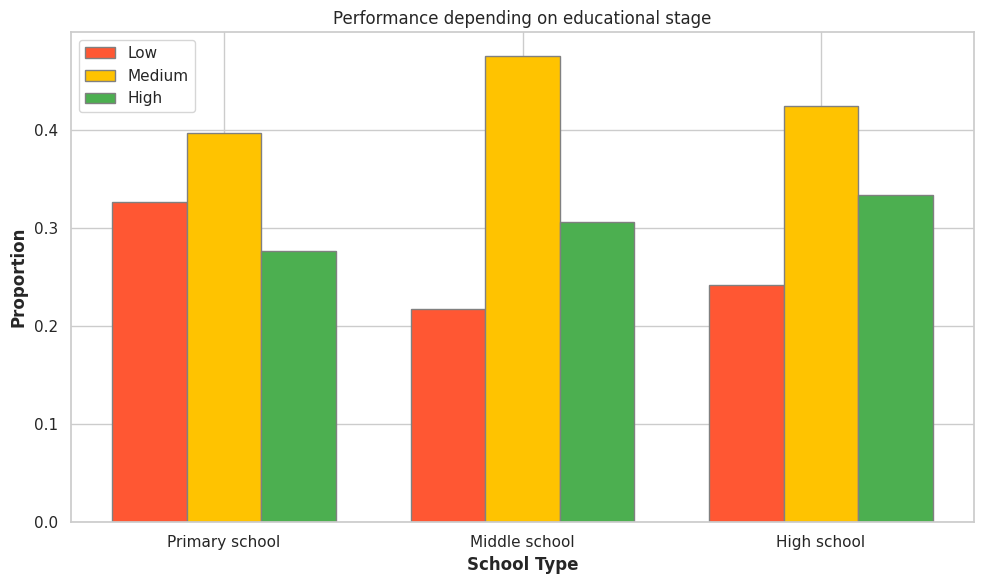

In [12]:
categories = list(stage_dictionary.keys())
H_values = [stage_dictionary[category]['H'] for category in categories]
M_values = [stage_dictionary[category]['M'] for category in categories]
L_values = [stage_dictionary[category]['L'] for category in categories]

bar_width = 0.25
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, L_values, color=degree_color_palette[0], width=bar_width, edgecolor='grey', label='L')
plt.bar(r2, M_values, color=degree_color_palette[1], width=bar_width, edgecolor='grey', label='M')
plt.bar(r3, H_values, color=degree_color_palette[2], width=bar_width, edgecolor='grey', label='H')

plt.xlabel('School Type', fontweight='bold')
plt.ylabel('Proportion', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categories))], categories)

plt.title('Performance depending on educational stage')
plt.legend(labels=degree_labels)
plt.tight_layout()
plt.show()

### Absence days influences performance

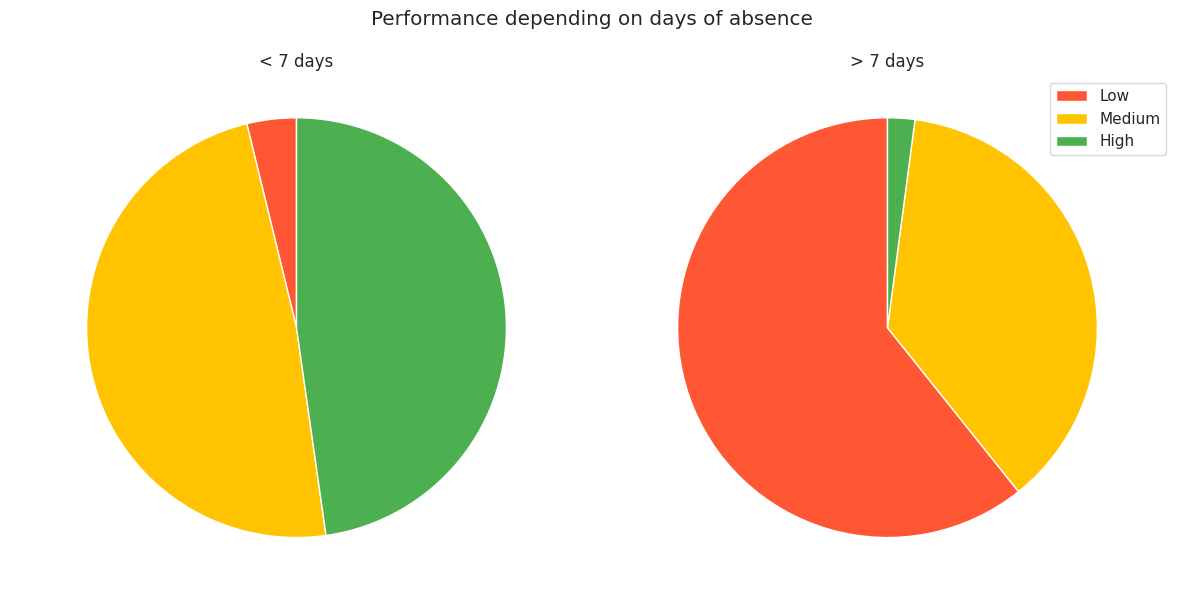

In [13]:
under7 = df[df['StudentAbsenceDays'] == 'Under-7']
above7 = df[df['StudentAbsenceDays'] == 'Above-7']

under7_H = under7[(under7["Class"] == "H")]
under7_M = under7[(under7["Class"] == "M")]
under7_L = under7[(under7["Class"] == "L")]

above7_H = above7[(above7["Class"] == "H")]
above7_M = above7[(above7["Class"] == "M")]
above7_L = above7[(above7["Class"] == "L")]

under7_class = len(under7_L) / len(under7), len(under7_M) / len(under7), len(under7_H) / len(under7)
above7_class = len(above7_L) / len(above7), len(above7_M) / len(above7), len(above7_H) / len(above7)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(under7_class, labels=None, startangle=90, colors=degree_color_palette)
axs[0].set_title('< 7 days')

axs[1].pie(above7_class, labels=None, startangle=90, colors=degree_color_palette)
axs[1].set_title('> 7 days')

fig.suptitle('Performance depending on days of absence')

for ax in axs:
    ax.axis('equal')

axs[1].legend(degree_labels, loc="best")
plt.tight_layout()
plt.show()

### Parents' survey influence on academic performance

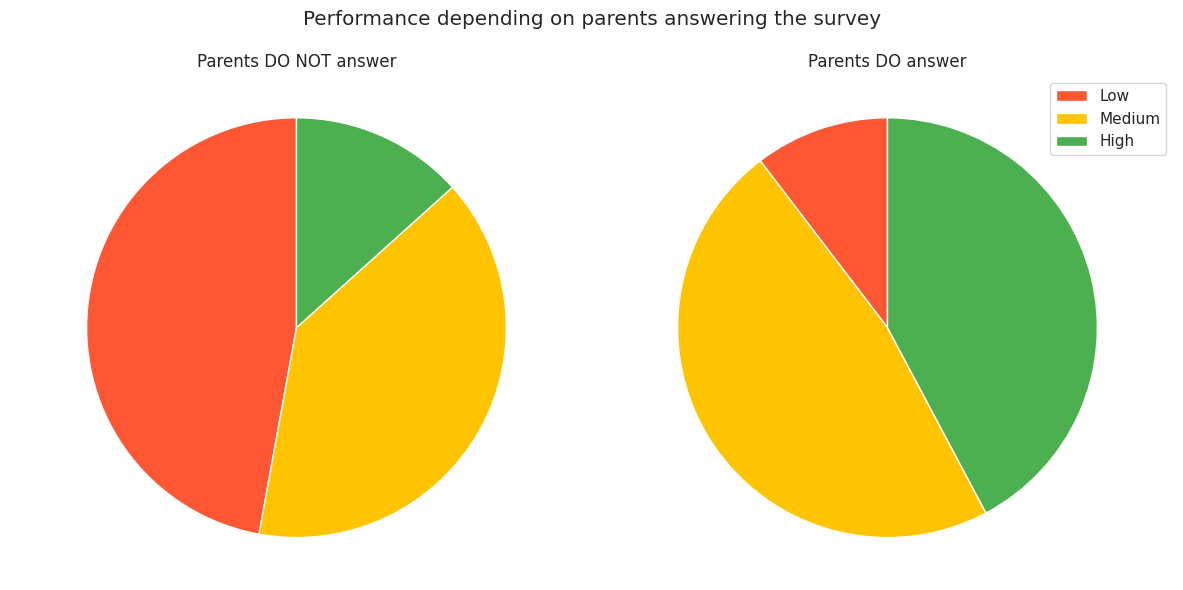

In [14]:
parent_satisfied_no = df[df['ParentAnsweringSurvey'] == 'No']
parent_satisfied_yes = df[df['ParentAnsweringSurvey'] == 'Yes']

parent_satisfied_no_H = parent_satisfied_no[(parent_satisfied_no["Class"] == "H")]
parent_satisfied_no_M = parent_satisfied_no[(parent_satisfied_no["Class"] == "M")]
parent_satisfied_no_L = parent_satisfied_no[(parent_satisfied_no["Class"] == "L")]

parent_satisfied_yes_H = parent_satisfied_yes[(parent_satisfied_yes["Class"] == "H")]
parent_satisfied_yes_M = parent_satisfied_yes[(parent_satisfied_yes["Class"] == "M")]
parent_satisfied_yes_L = parent_satisfied_yes[(parent_satisfied_yes["Class"] == "L")]

parent_satisfied_no_class = (
    len(parent_satisfied_no_L) / len(parent_satisfied_no),
    len(parent_satisfied_no_M) / len(parent_satisfied_no),
    len(parent_satisfied_no_H) / len(parent_satisfied_no)
)

parent_satisfied_yes_class = (
    len(parent_satisfied_yes_L) / len(parent_satisfied_yes),
    len(parent_satisfied_yes_M) / len(parent_satisfied_yes),
    len(parent_satisfied_yes_H) / len(parent_satisfied_yes)
)


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(parent_satisfied_no_class, labels=None, startangle=90, colors=degree_color_palette)
axs[0].set_title('Parents DO NOT answer')

axs[1].pie(parent_satisfied_yes_class, labels=None, startangle=90, colors=degree_color_palette)
axs[1].set_title('Parents DO answer')

fig.suptitle('Performance depending on parents answering the survey')

for ax in axs:
    ax.axis('equal')

axs[1].legend(degree_labels, loc="best")
plt.tight_layout()
plt.show()

## Behavioral analysis

In [15]:
real_labels = ['H', 'M', 'L']
performance_mapping = {r: e for r, e in zip(real_labels, degree_labels[::-1])}
formatted_df = df.copy()
formatted_df['Formatted_Class'] = df['Class'].map(performance_mapping)

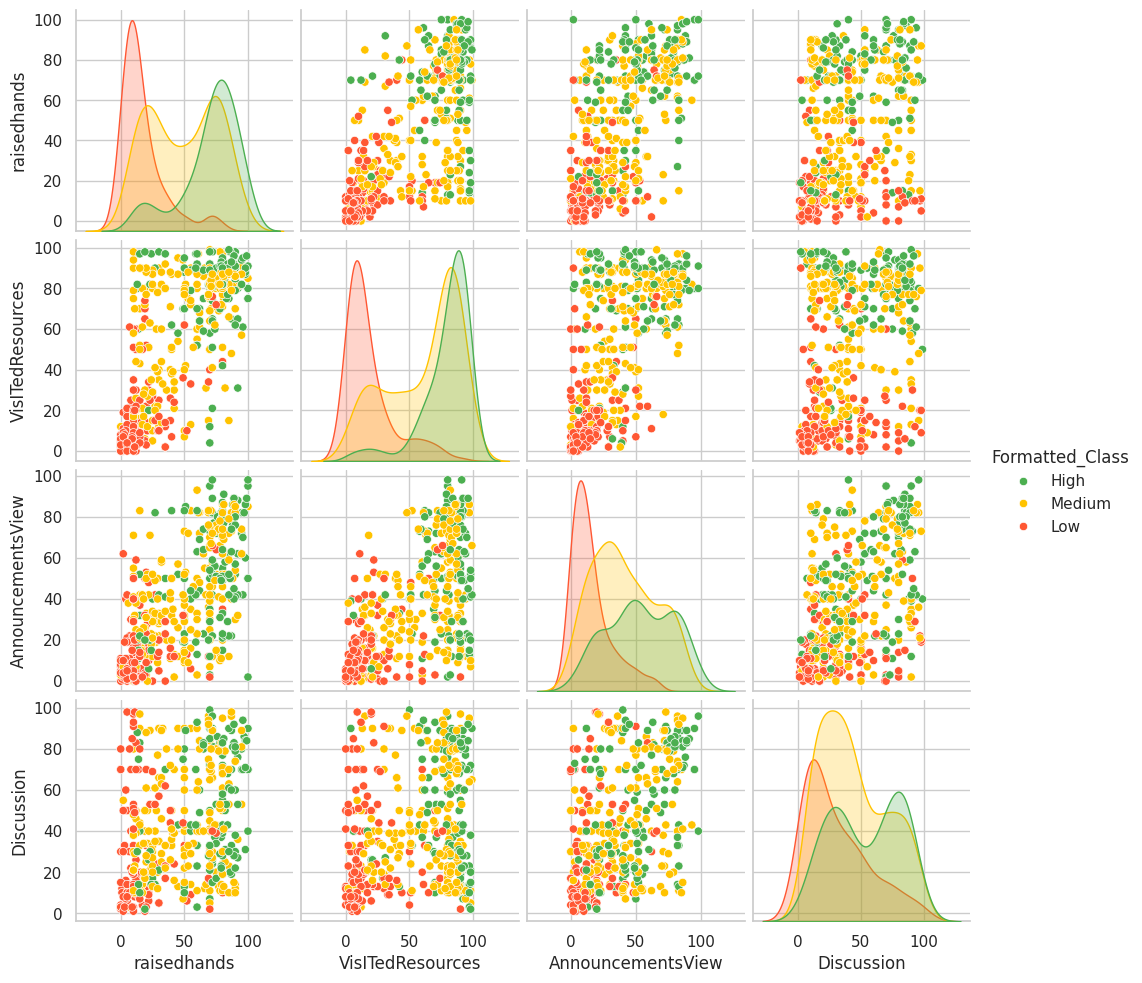

In [16]:
sns.pairplot(data=formatted_df, hue='Formatted_Class', hue_order=degree_labels[::-1], palette=degree_color_palette[::-1])

### Performance by participation in discussion groups

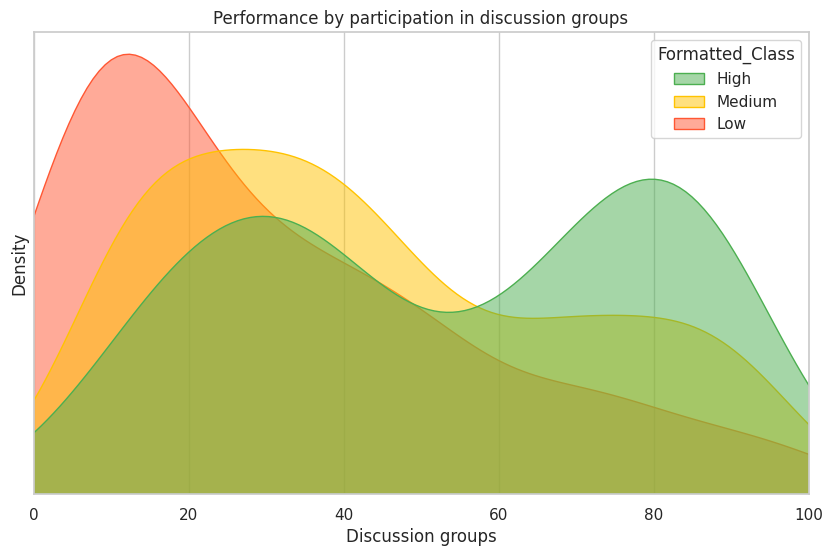

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=formatted_df, x='Discussion', hue='Formatted_Class', hue_order=degree_labels[::-1], palette=degree_color_palette[::-1], fill=True, common_norm=False, alpha=0.5)
plt.title('Performance by participation in discussion groups')
plt.yticks([])
plt.xlim(0, 100)
plt.xlabel('Discussion groups')
plt.ylabel('Density')
plt.show()

### Performance by the amount of announcement views

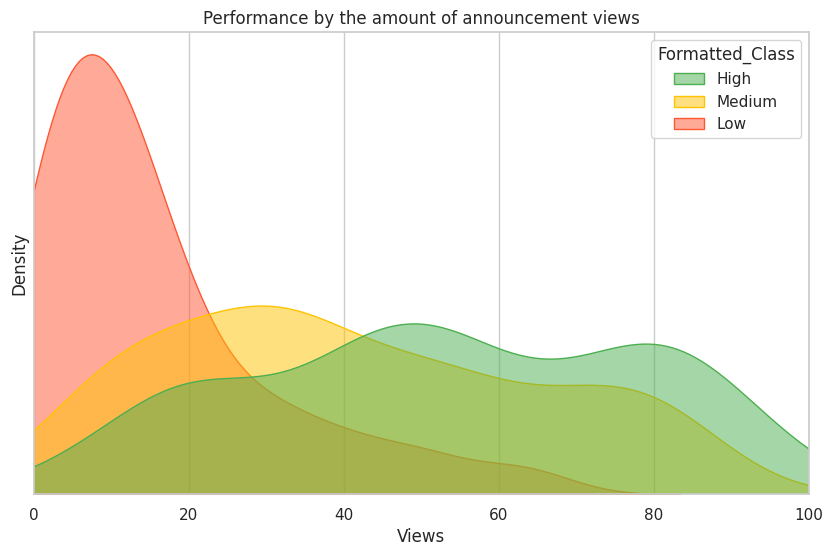

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=formatted_df, x='AnnouncementsView', hue='Formatted_Class', hue_order=degree_labels[::-1], palette=degree_color_palette[::-1], fill=True, common_norm=False, alpha=0.5)
plt.title('Performance by the amount of announcement views')
plt.yticks([])
plt.xlim(0, 100)
plt.xlabel('Views')
plt.ylabel('Density')
plt.show()

### Performance by the amount of visited resources

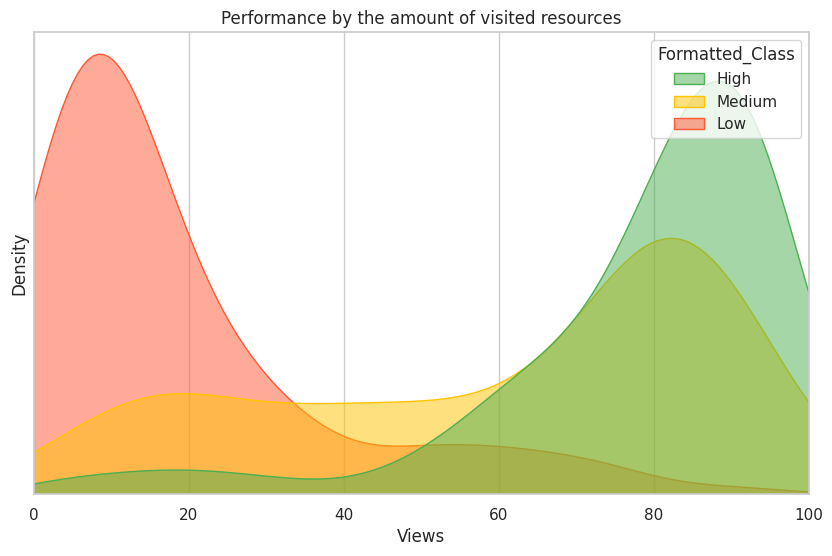

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=formatted_df, x='VisITedResources', hue='Formatted_Class', fill=True, hue_order=degree_labels[::-1], palette=degree_color_palette[::-1], common_norm=False, alpha=0.5)
plt.title('Performance by the amount of visited resources')
plt.yticks([])
plt.xlim(0, 100)
plt.xlabel('Views')
plt.ylabel('Density')
plt.show()

### Performance by the amount of raised hands

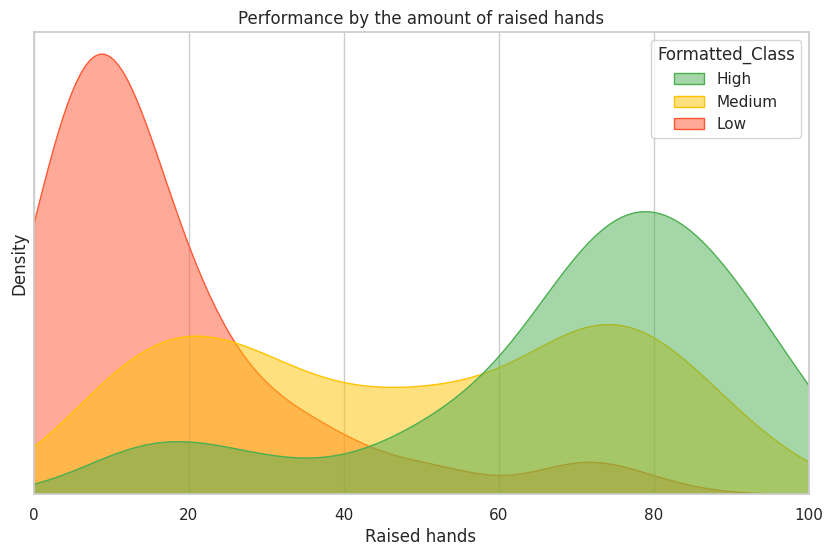

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=formatted_df, x='raisedhands', hue='Formatted_Class', hue_order=degree_labels[::-1], palette=degree_color_palette[::-1], fill=True, common_norm=False, alpha=0.5)
plt.title('Performance by the amount of raised hands')
plt.yticks([])
plt.xlim(0, 100)
plt.xlabel('Raised hands')
plt.ylabel('Density')
plt.show()

## General attributes

### Parents' school satisfaction

In [21]:
parents_satisfaction_dictionary = {
    "Good": {
        "H": len(df[(df["ParentschoolSatisfaction"] == "Good") & (df["Class"] == "H")]),
        "M": len(df[(df["ParentschoolSatisfaction"] == "Good") & (df["Class"] == "M")]),
        "L": len(df[(df["ParentschoolSatisfaction"] == "Good") & (df["Class"] == "L")]),
    },
    "Bad": {
        "H": len(df[(df["ParentschoolSatisfaction"] == "Bad") & (df["Class"] == "H")]),
        "M": len(df[(df["ParentschoolSatisfaction"] == "Bad") & (df["Class"] == "M")]),
        "L": len(df[(df["ParentschoolSatisfaction"] == "Bad") & (df["Class"] == "L")]),
    }
}

for key, value in parents_satisfaction_dictionary.items():
    if key == "Good":
        for key_x, value_x in parents_satisfaction_dictionary[key].items():
            parents_satisfaction_dictionary[key][key_x] /= len(df[(df["ParentschoolSatisfaction"] == "Good")])
    elif key == "Bad":
        for key_x, value_x in parents_satisfaction_dictionary[key].items():
            parents_satisfaction_dictionary[key][key_x] /= len(df[(df["ParentschoolSatisfaction"] == "Bad")])
    else:
        print("WARNING: Unknown parents satisfaction:", key)

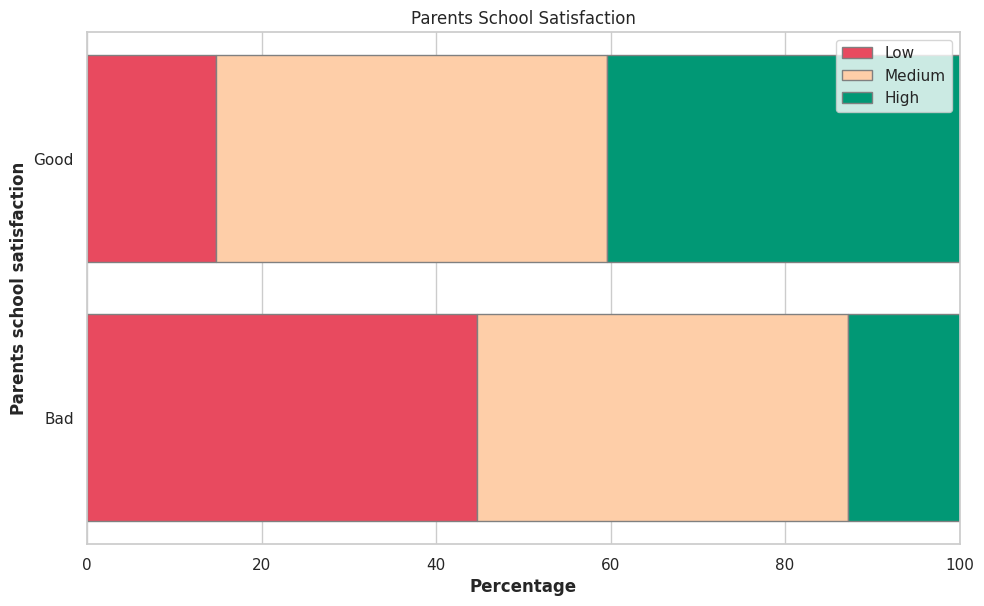

In [22]:
categories = list(parents_satisfaction_dictionary.keys())
H_values = [parents_satisfaction_dictionary[category]['H'] for category in categories]
M_values = [parents_satisfaction_dictionary[category]['M'] for category in categories]
L_values = [parents_satisfaction_dictionary[category]['L'] for category in categories]

totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]

sorted_data = sorted(zip(categories, H_values, M_values, L_values, totals), key=lambda x: x[4], reverse=True)
sorted_data.reverse()

categories, H_values, M_values, L_values, _ = zip(*sorted_data)

totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]
H_percent = [H / total * 100 for H, total in zip(H_values, totals)]
M_percent = [M / total * 100 for M, total in zip(M_values, totals)]
L_percent = [L / total * 100 for L, total in zip(L_values, totals)]

bar_width = 0.5
r1 = np.arange(len(categories))

plt.figure(figsize=(10, 6))

plt.barh(r1, L_percent, color=satisfaction_color_palette[0], edgecolor='grey', label='Low')
plt.barh(r1, M_percent, left=L_percent, color=satisfaction_color_palette[1], edgecolor='grey', label='Medium')
plt.barh(r1, H_percent, left=[i + j for i, j in zip(L_percent, M_percent)], color=satisfaction_color_palette[2], edgecolor='grey', label='High')

plt.xlabel('Percentage', fontweight='bold')
plt.ylabel('Parents school satisfaction', fontweight='bold')
plt.yticks(r1, categories)
plt.xlim(0, 100)

plt.legend()
plt.tight_layout()
plt.title('Parents School Satisfaction')
plt.show()

### On which semester pupils learn better?

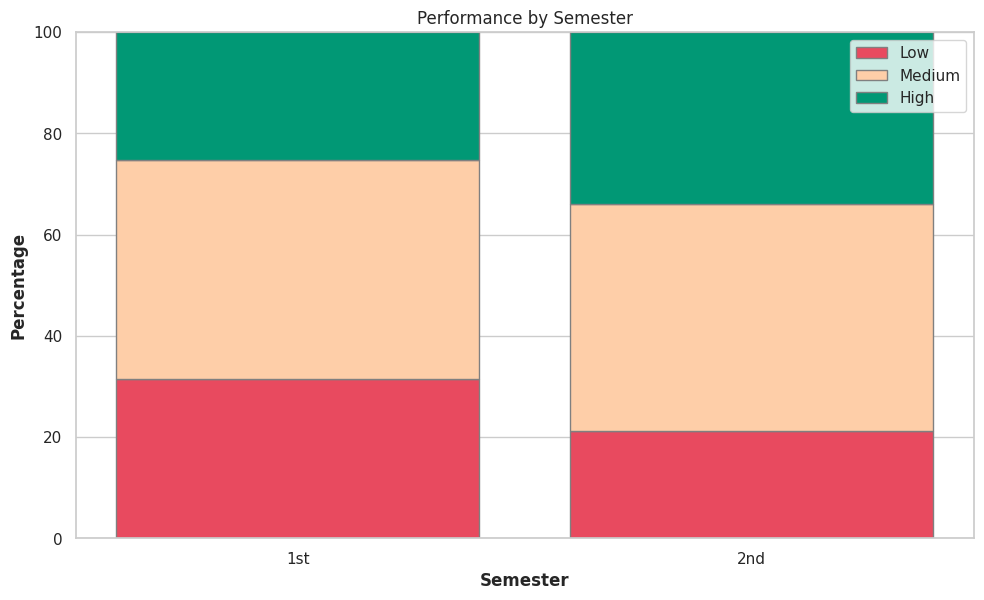

In [23]:
semester_performance_dictionary = {
    "F": {
        "H": len(df[(df["Semester"] == "F") & (df["Class"] == "H")]),
        "M": len(df[(df["Semester"] == "F") & (df["Class"] == "M")]),
        "L": len(df[(df["Semester"] == "F") & (df["Class"] == "L")]),
    },
    "S": {
        "H": len(df[(df["Semester"] == "S") & (df["Class"] == "H")]),
        "M": len(df[(df["Semester"] == "S") & (df["Class"] == "M")]),
        "L": len(df[(df["Semester"] == "S") & (df["Class"] == "L")]),
    }
}

for key in semester_performance_dictionary:
    total = sum(semester_performance_dictionary[key].values())
    for key_x in semester_performance_dictionary[key]:
        semester_performance_dictionary[key][key_x] /= total

categories = list(semester_performance_dictionary.keys())
H_values = [semester_performance_dictionary[category]['H'] for category in categories]
M_values = [semester_performance_dictionary[category]['M'] for category in categories]
L_values = [semester_performance_dictionary[category]['L'] for category in categories]

totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]
sorted_data = sorted(zip(categories, H_values, M_values, L_values, totals), key=lambda x: x[4], reverse=True)

categories, H_values, M_values, L_values, _ = zip(*sorted_data)

totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]
H_percent = [H * 100 for H in H_values]
M_percent = [M * 100 for M in M_values]
L_percent = [L * 100 for L in L_values]

bar_width = 0.5
r1 = np.arange(len(categories))

plt.figure(figsize=(10, 6))

plt.bar(r1, L_percent, color=satisfaction_color_palette[0], edgecolor='grey', label='Low')
plt.bar(r1, M_percent, bottom=L_percent, color=satisfaction_color_palette[1], edgecolor='grey', label='Medium')
plt.bar(r1, H_percent, bottom=[i + j for i, j in zip(L_percent, M_percent)], color=satisfaction_color_palette[2], edgecolor='grey', label='High')

plt.xlabel('Semester', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(r1, ['1st', '2nd'])
plt.ylim(0, 100)

plt.legend()
plt.tight_layout()
plt.title('Performance by Semester')
plt.show()

### Performance depending on the parent responsible for the student

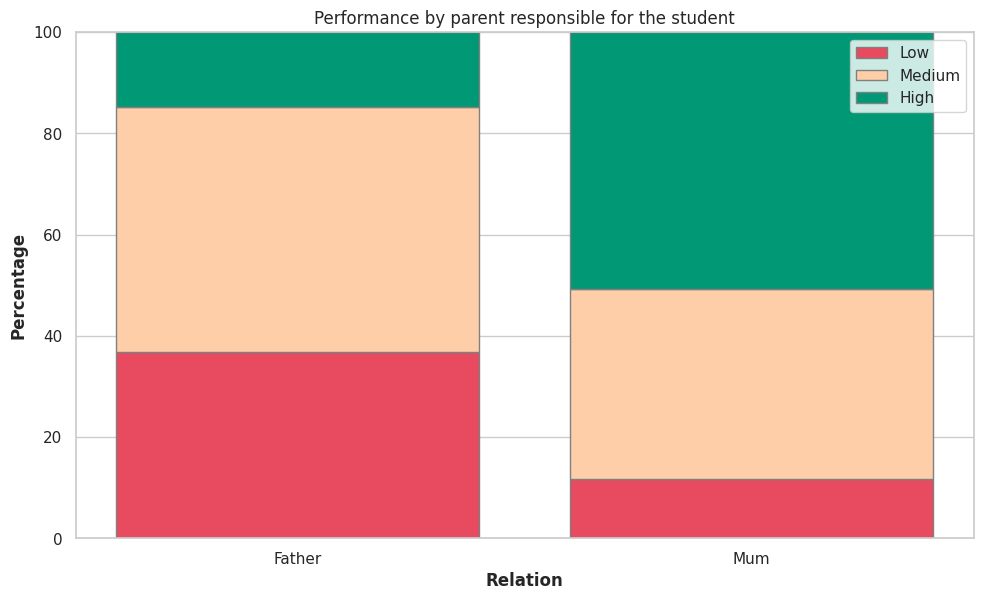

In [24]:
relation_performance_dictionary = {
    "Father": {
        "H": len(df[(df["Relation"] == "Father") & (df["Class"] == "H")]),
        "M": len(df[(df["Relation"] == "Father") & (df["Class"] == "M")]),
        "L": len(df[(df["Relation"] == "Father") & (df["Class"] == "L")]),
    },
    "Mum": {
        "H": len(df[(df["Relation"] == "Mum") & (df["Class"] == "H")]),
        "M": len(df[(df["Relation"] == "Mum") & (df["Class"] == "M")]),
        "L": len(df[(df["Relation"] == "Mum") & (df["Class"] == "L")]),
    }
}

for key in relation_performance_dictionary:
    total = sum(relation_performance_dictionary[key].values())
    for key_x in relation_performance_dictionary[key]:
        relation_performance_dictionary[key][key_x] /= total

categories = list(relation_performance_dictionary.keys())
H_values = [relation_performance_dictionary[category]['H'] for category in categories]
M_values = [relation_performance_dictionary[category]['M'] for category in categories]
L_values = [relation_performance_dictionary[category]['L'] for category in categories]

totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]
sorted_data = sorted(zip(categories, H_values, M_values, L_values, totals), key=lambda x: x[4], reverse=True)

categories, H_values, M_values, L_values, _ = zip(*sorted_data)

H_percent = [H * 100 for H in H_values]
M_percent = [M * 100 for M in M_values]
L_percent = [L * 100 for L in L_values]

bar_width = 0.5
r1 = np.arange(len(categories))

plt.figure(figsize=(10, 6))

plt.bar(r1, L_percent, color=satisfaction_color_palette[0], edgecolor='grey', label='Low')
plt.bar(r1, M_percent, bottom=L_percent, color=satisfaction_color_palette[1], edgecolor='grey', label='Medium')
plt.bar(r1, H_percent, bottom=[i + j for i, j in zip(L_percent, M_percent)], color=satisfaction_color_palette[2], edgecolor='grey', label='High')

plt.xlabel('Relation', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(r1, categories)
plt.ylim(0, 100)

plt.legend()
plt.tight_layout()
plt.title('Performance by parent responsible for the student')
plt.show()

### Performance by the topic learned

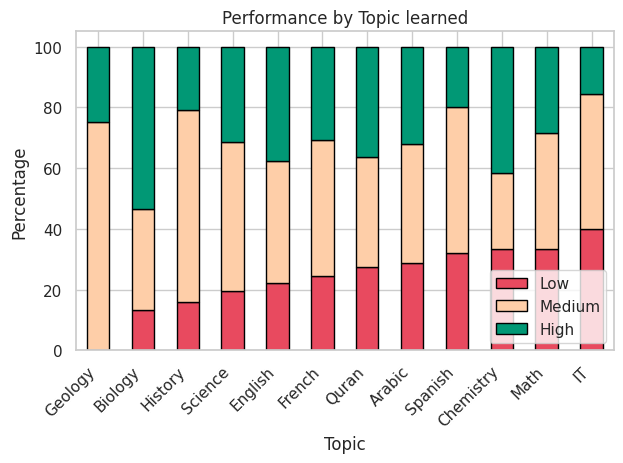

In [25]:
topic_performance = df.groupby(['Topic', 'Class']).size().unstack(fill_value=0)
topic_performance_percent = topic_performance.div(topic_performance.sum(axis=1), axis=0) * 100
topic_performance_percent = topic_performance_percent[['L', 'M', 'H']]
topic_performance_percent = topic_performance_percent.sort_values(by='L')
topic_performance_percent.plot(kind='bar', stacked=True, color=satisfaction_color_palette, edgecolor='black')

plt.xlabel('Topic')
plt.ylabel('Percentage')
plt.title('Performance by Topic learned')
plt.xticks(rotation=45, ha='right')
plt.legend(loc="lower right", labels=degree_labels)
plt.tight_layout()

plt.show()

### Letter of the class student is learning at

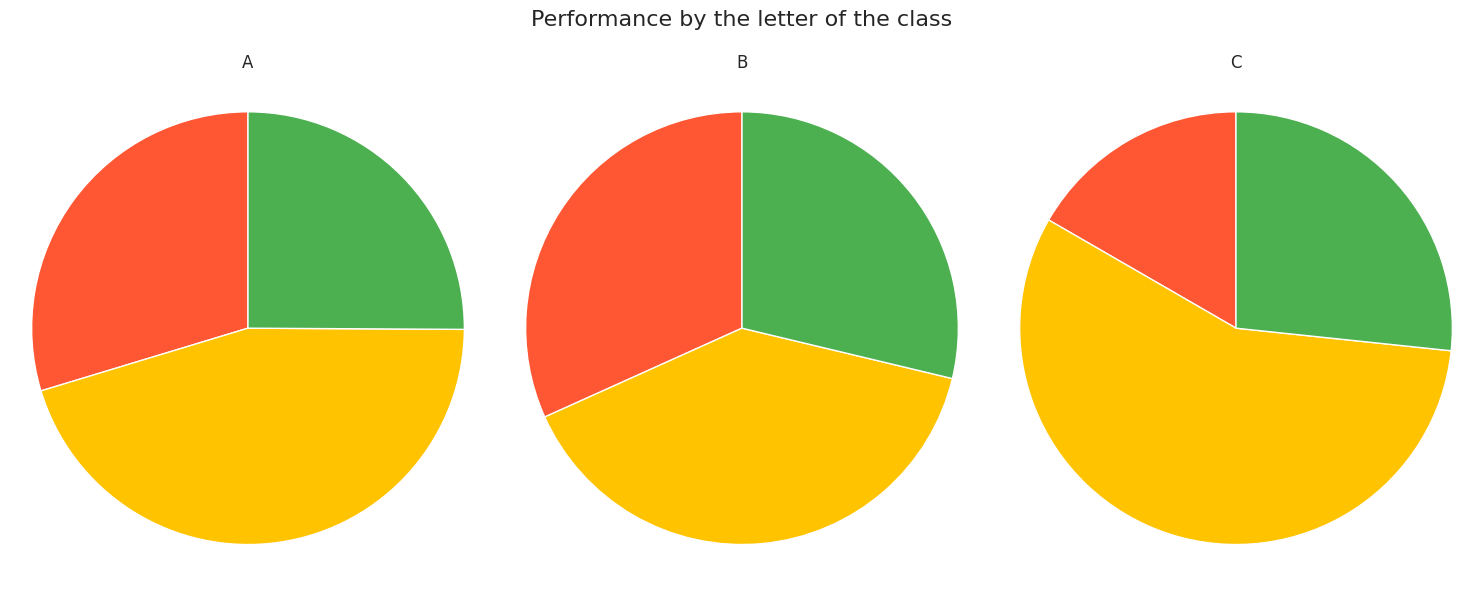

In [26]:
class_a = df[df['SectionID'] == 'A']
class_b = df[df['SectionID'] == 'B']
class_c = df[df['SectionID'] == 'C']

class_a_H = class_a[(class_a["Class"] == "H")]
class_a_M = class_a[(class_a["Class"] == "M")]
class_a_L = class_a[(class_a["Class"] == "L")]

class_b_H = class_b[(class_b["Class"] == "H")]
class_b_M = class_b[(class_b["Class"] == "M")]
class_b_L = class_b[(class_b["Class"] == "L")]

class_c_H = class_c[(class_c["Class"] == "H")]
class_c_M = class_c[(class_c["Class"] == "M")]
class_c_L = class_c[(class_c["Class"] == "L")]

class_a_class = (
    len(class_a_H) / len(class_a),
    len(class_a_M) / len(class_a),
    len(class_a_L) / len(class_a)
)

class_b_class = (
    len(class_b_H) / len(class_b),
    len(class_b_M) / len(class_b),
    len(class_b_L) / len(class_b)
)

class_c_class = (
    len(class_c_H) / len(class_c),
    len(class_c_M) / len(class_c),
    len(class_c_L) / len(class_c)
)


fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs[0].pie(class_a_class, labels=None, colors=degree_color_palette, startangle=90, textprops={'fontsize': 14})
axs[0].set_title('A')

axs[1].pie(class_b_class, labels=None, colors=degree_color_palette, startangle=90, textprops={'fontsize': 14})
axs[1].set_title('B')

axs[2].pie(class_c_class, labels=None, colors=degree_color_palette, startangle=90, textprops={'fontsize': 14})
axs[2].set_title('C')

fig.suptitle('Performance by the letter of the class', fontsize=16)

for ax in axs:
    ax.axis('equal')

plt.tight_layout()
plt.show()

## Interesting observations from the data

### Activity correlations

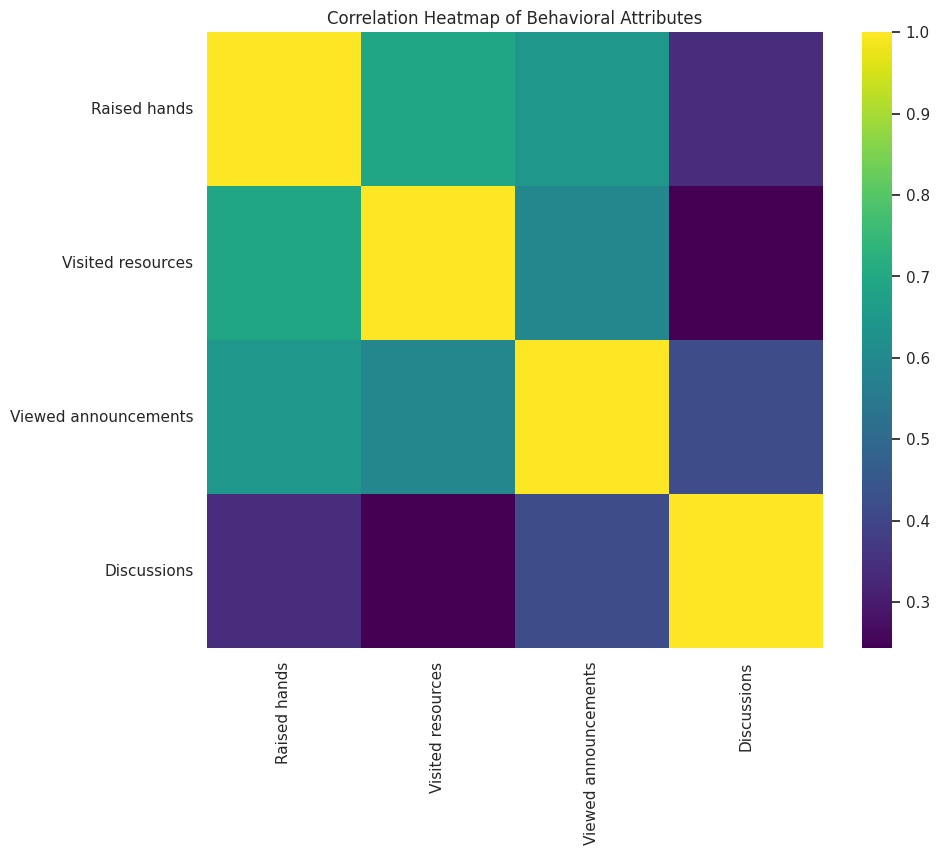

In [27]:
attributes = ["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]
attribute_titles = ["Raised hands", "Visited resources", "Viewed announcements", "Discussions"]
corr_matrix = df[attributes].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="viridis", fmt=".2f", square=True, 
            xticklabels=attribute_titles, yticklabels=attribute_titles)
plt.title('Correlation Heatmap of Behavioral Attributes')
plt.show()

### Comparison of parenting

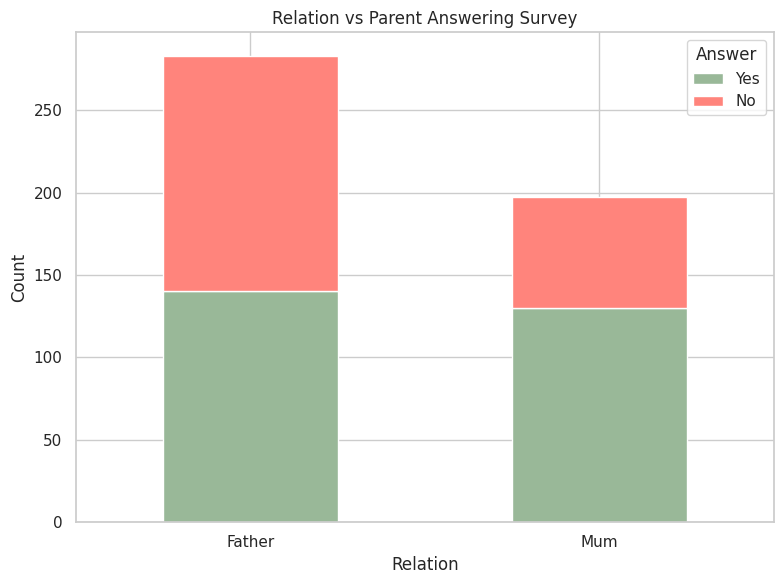

In [28]:
contingency_table = pd.crosstab(df['Relation'], df['ParentAnsweringSurvey'])
contingency_table[['Yes', 'No']].plot(kind='bar', stacked=True, figsize=(8, 6), color=boolean_color_palette)

plt.xlabel('Relation')
plt.ylabel('Count')
plt.title('Relation vs Parent Answering Survey')

plt.legend(title='Answer')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

As a conclusion we may say that mums (percent-wise) more often answer the surveys than dads.

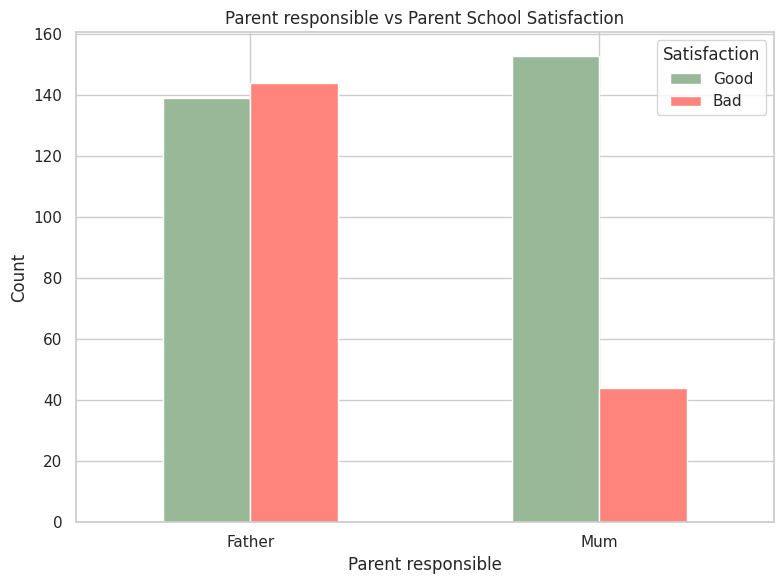

In [29]:
contingency_table = pd.crosstab(df['Relation'], df['ParentschoolSatisfaction'])
contingency_table = contingency_table[['Good', 'Bad']]
contingency_table.plot(kind='bar', figsize=(8, 6), color=boolean_color_palette)

plt.xlabel('Parent responsible')
plt.ylabel('Count')
plt.title('Parent responsible vs Parent School Satisfaction')

plt.legend(title='Satisfaction')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

From this graph it seems that either mums are loyal to the schools their children are studying at or they choose better schools for their children at the first place.

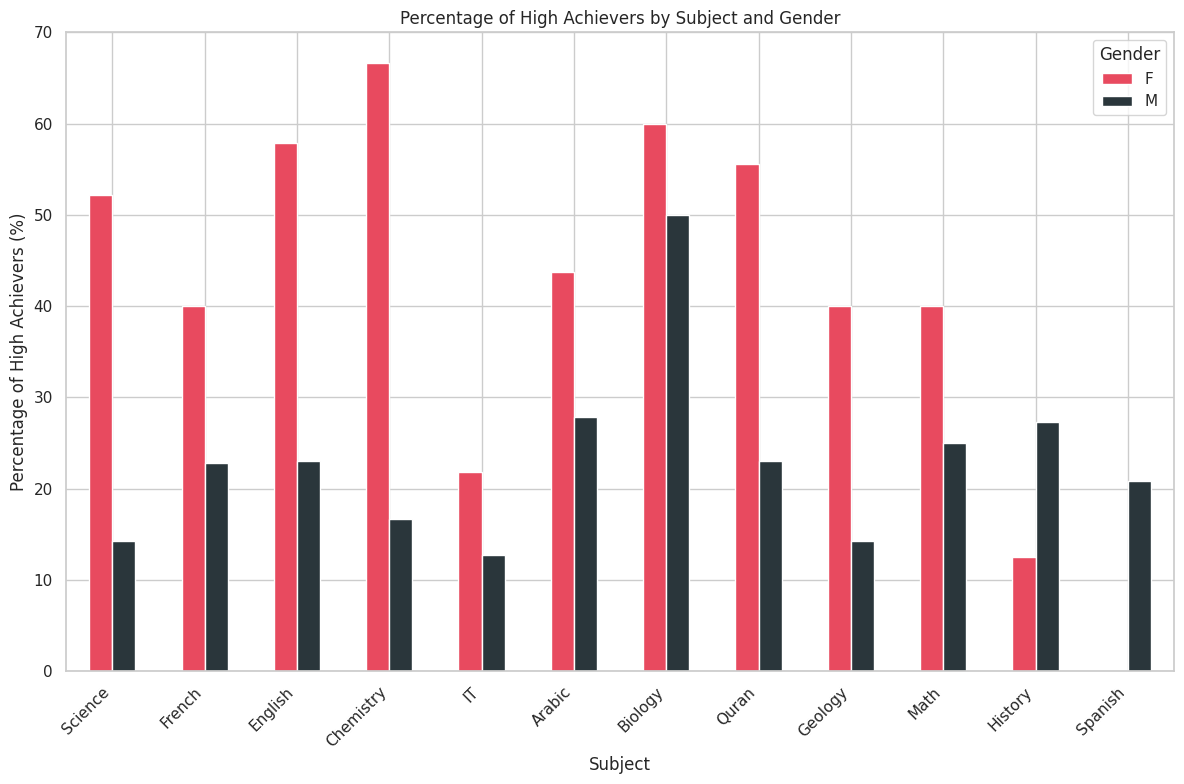

In [30]:
df_h = df[df['Class'] == 'H']
h_counts = df_h.groupby(['Topic', 'gender']).size().unstack(fill_value=0)
total_gender_counts = df.groupby(['Topic', 'gender']).size().unstack(fill_value=0)
h_percentages = (h_counts.div(total_gender_counts) * 100).round(2)
female_totals = h_counts['F']
h_percentages_sorted = h_percentages.loc[female_totals.sort_values(ascending=False).index]

h_percentages_sorted.plot(kind='bar', figsize=(12, 8), color=gender_color_palette)
plt.xlabel('Subject')
plt.ylabel('Percentage of High Achievers (%)')
plt.title('Percentage of High Achievers by Subject and Gender')

plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Female pupils have more high-achievers (percent-wise) for almost all subjects.

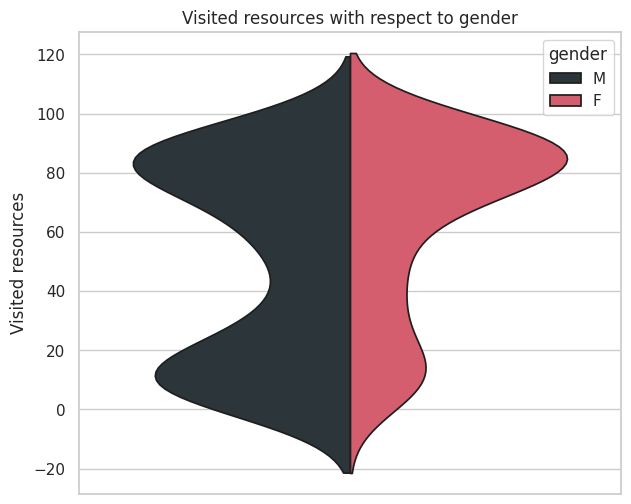

In [31]:
df_v = df.copy()
df_v['dummy'] = [1 for _ in range(df.shape[0])]
plt.figure(figsize=(7, 6))
sns.violinplot(df_v, x='dummy', y='VisITedResources', hue='gender', split=True, inner=None, palette=gender_color_palette[::-1])

plt.title('Visited resources with respect to gender')
plt.xticks([])
plt.xlabel("")
plt.ylabel("Visited resources")
plt.show()


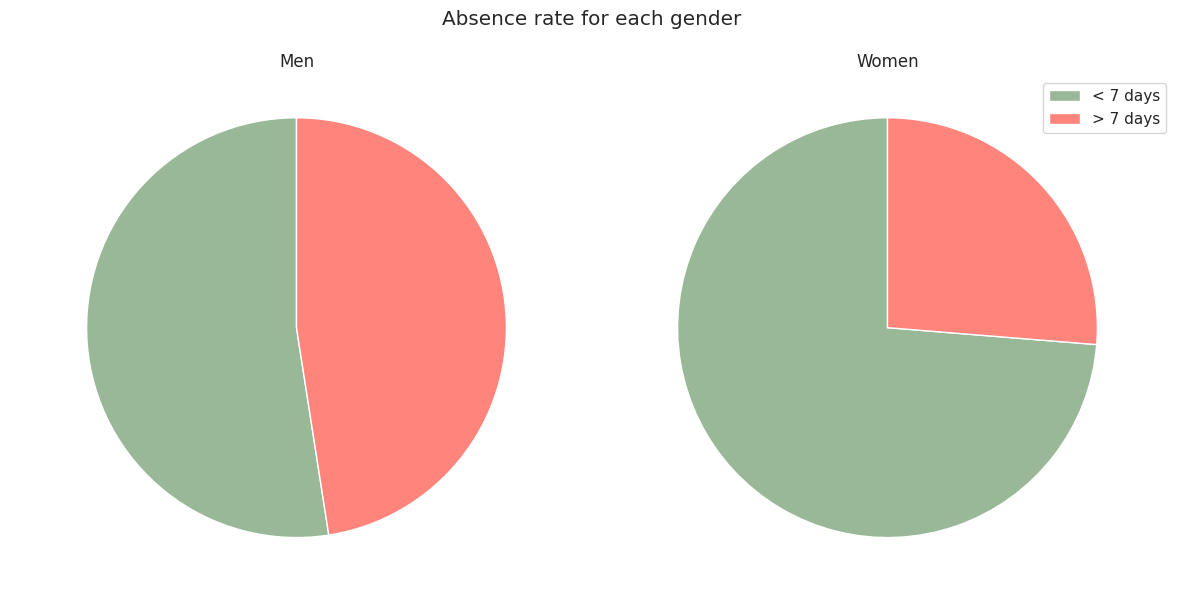

In [32]:
female = df[df['gender'] == 'F']
male = df[df['gender'] == 'M']

female_under7 = female[(female["StudentAbsenceDays"] == "Under-7")]
male_under7 = male[(male["StudentAbsenceDays"] == "Under-7")]

female_above7 = female[(female["StudentAbsenceDays"] == "Above-7")]
male_above7 = male[(male["StudentAbsenceDays"] == "Above-7")]

female_class = len(female_under7) / len(female), len(female_above7) / len(female)
male_class = len(male_under7) / len(male), len(male_above7) / len(male)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(male_class, labels=None, startangle=90, colors=boolean_color_palette)
axs[0].set_title('Men')

axs[1].pie(female_class, labels=None, startangle=90, colors=boolean_color_palette)
axs[1].set_title('Women')

fig.suptitle('Absence rate for each gender')

for ax in axs:
    ax.axis('equal')

axs[1].legend(['< 7 days', '> 7 days'], loc="best")
plt.tight_layout()
plt.show()

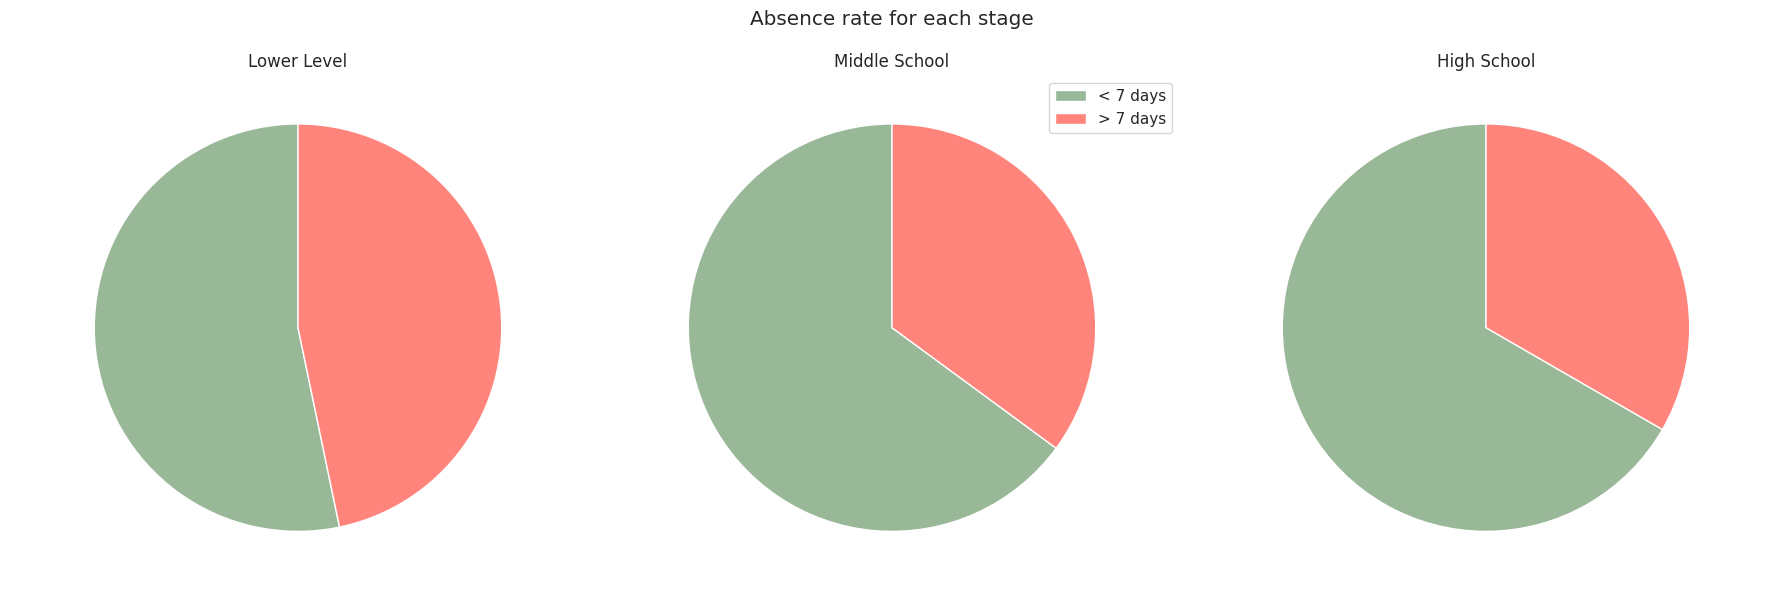

In [33]:
# NOT THAT INTERESTING

low = df[df['StageID'] == 'lowerlevel']
mid = df[df['StageID'] == 'MiddleSchool']
high = df[df['StageID'] == 'HighSchool']

low_under7 = low[(low["StudentAbsenceDays"] == "Under-7")]
mid_under7 = mid[(mid["StudentAbsenceDays"] == "Under-7")]
high_under7 = high[(high["StudentAbsenceDays"] == "Under-7")]

low_above7 = low[(low["StudentAbsenceDays"] == "Above-7")]
mid_above7 = mid[(mid["StudentAbsenceDays"] == "Above-7")]
high_above7 = high[(high["StudentAbsenceDays"] == "Above-7")]

low_class = len(low_under7) / len(low), len(low_above7) / len(low)
mid_class = len(mid_under7) / len(mid), len(mid_above7) / len(mid)
high_class = len(high_under7) / len(high), len(high_above7) / len(high)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].pie(low_class, labels=None, startangle=90, colors=boolean_color_palette)
axs[0].set_title('Lower Level')

axs[1].pie(mid_class, labels=None, startangle=90, colors=boolean_color_palette)
axs[1].set_title('Middle School')

axs[2].pie(high_class, labels=None, startangle=90, colors=boolean_color_palette)
axs[2].set_title('High School')

fig.suptitle('Absence rate for each stage')

for ax in axs:
    ax.axis('equal')

axs[1].legend(['< 7 days', '> 7 days'], loc="best")
plt.tight_layout()
plt.show()